# DETE and TAFE: Employee Exit Surveys

<br></br>
<i>The Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) are institutes in Queensland, Australia.</i>


## Datasets

There are two datasets, both from employee exit surveys: [one from DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), and [another from TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

Here are some of the columns from the `dete_survey.csv`:

| Column              | Definition          |
|:--------------------|:--------------------|
| ID | An id used to identify the participant of the survey |
| SeparationType | The reason why the person's employment ended |
| Cease Date | The year or month the person's employment ended |
| DETE Start Date | The year the person began employment with the DETE |

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

| Column              | Definition          |
|:--------------------|:--------------------|
| Record ID | An id used to identify the participant of the survey |
| Reason for ceasing employment | The reason why the person's employment ended |
| LengthofServiceOverall. | Overall Length of Service at Institute (in years). The length of the person's employment (in years) |

In this project, the aim is to combine both surveys to find out if newer employees (those who only worked for the institutes for a short period of time) are resigning due to some kind of dissatisfaction. Included in the aim is to understand if older employees are resigned due to dissatisfaction.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('datasets/exit_survey_dete_january_2014.csv', na_values=['Not Stated'])
tafe_survey = pd.read_csv('datasets/exit_survey_tafe_december_2013.csv', encoding='latin-1')

In [2]:
dete_survey.head().T

,0,1,2,3,4
ID,1,2,3,4,5
SeparationType,Ill Health Retirement,Voluntary Early Retirement (VER),Voluntary Early Retirement (VER),Resignation-Other reasons,Age Retirement
Cease Date,08/2012,08/2012,05/2012,05/2012,05/2012
DETE Start Date,1984,NaN,2011,2005,1970
Role Start Date,2004,NaN,2011,2006,1989
Position,Public Servant,Public Servant,Schools Officer,Teacher,Head of Curriculum/Head of Special Education
Classification,A01-A04,AO5-AO7,NaN,Primary,NaN
Region,Central Office,Central Office,Central Office,Central Queensland,South East
Business Unit,Corporate Strategy and Peformance,Corporate Strategy and Peformance,Education Queensland,NaN,NaN
Employment Status,Permanent Full-time,Permanent Full-time,Permanent Full-time,Permanent Full-time,Permanent Full-time


A few notes about the DETE data:

1. A number of columns, including `DETE Start Date` and `Role Start Date`, had `Not Stated` values that need to be converted to `NaN` for easier processing later.
2. Columns with significantly low non-null counts include `Business Unit`, `Aboriginal`, `Torres Strait`, `South Sea`, `Disability`, `NESB` (Non-English Speaking Background). These columns seem to refer to special categories of an individual, which may be combined into a single column.
3. Columns 28-49 seem unnecessary for analysis, and may be dropped to make the scope of project more manageable.

In [3]:
tafe_survey.iloc[:,:36].head(5).T

,0,1,2,3,4
Record ID,634133009996094000,634133654064531000,634138845606563000,634139903350000000,634146578511788000
Institute,Southern Queensland Institute of TAFE,Mount Isa Institute of TAFE,Mount Isa Institute of TAFE,Mount Isa Institute of TAFE,Southern Queensland Institute of TAFE
WorkArea,Non-Delivery (corporate),Non-Delivery (corporate),Delivery (teaching),Non-Delivery (corporate),Delivery (teaching)
CESSATION YEAR,2010,2010,2010,2010,2010
Reason for ceasing employment,Contract Expired,Retirement,Retirement,Resignation,Resignation
Contributing Factors. Career Move - Public Sector,NaN,-,-,-,-
Contributing Factors. Career Move - Private Sector,NaN,-,-,-,Career Move - Private Sector
Contributing Factors. Career Move - Self-employment,NaN,-,-,-,-
Contributing Factors. Ill Health,NaN,-,-,-,-
Contributing Factors. Maternity/Family,NaN,-,-,-,-


In [4]:
tafe_survey.iloc[:,36:].head(9).T

,0,1,2,3,4,5,6,7,8
WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Disagree,Strongly Agree
WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Disagree,Strongly Agree
WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],Agree,Agree,Agree,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Disagree,Strongly Agree
WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Disagree,Strongly Agree
WorkUnitViews. Topic:23. My job provided sufficient variety,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Neutral,Strongly Agree
WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Disagree,Strongly Agree
WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Disagree,Strongly Agree,Disagree,Strongly Agree
WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Neutral,Strongly Agree
"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Disagree,Strongly Agree,Neutral,Strongly Agree
WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,Neutral,Agree,Agree,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Neutral,Strongly Agree


A few notes about the TEFE Survey Data:
- Most of the columns have long names, which makes it difficult to handle and manipulate. Renaming seems necessary here.
- There are 12 `Contributing Factors` columns that can be transformed and combined for easier handling.
- Columns 17-66 seem unnecessary for analysis, and may be dropped to make the scope of project more manageable.

## Cleaning the Data

These are the steps that needed to be accomplished to make the data ready for analysis:

- Dropping columns not needed for analysis
- Standardizing disparate column names
- Filtering irrelevant (non-resignation) rows
- Verifying and fixing the years column
- Creating the `institute_service` column
- Cleaning the `Contributing Factors` columns
- Creating a new column indicating if an employee resigned because of dissatisfaction

### Dropping Columns

To streamline the volume of data that needs to be reviewed for the analysis, columns that are unnecessary for the study need to be dropped.

In [5]:
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey.shape

(822, 35)

In [6]:
tafe_survey = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey.shape

(702, 23)

### Standardizing Column Names

Each dataframe contains many of the same columns, but their names are different. Below are some of the columns that are important to standardize, so the datasets can be combined prior to analysis.

| DETE Survey Column Name | TAFE Survey Column Name	| Definition
| :-- | :-- | :-- | 
| ID | Record ID | An id used to identify the participant of the survey |
| SeparationType | Reason for ceasing employment | The reason why the participant's employment ended |
| Cease Date | CESSATION YEAR | The year or month the participant's employment ended |
| DETE Start Date | | The year the participant began employment with the DETE |
| | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years) |
| Age | CurrentAge. Current Age | The age of the participant |
| Gender | Gender. What is your Gender? | The gender of the participant Because we eventually want to combine them, we'll have to standardize the column names. |

In [7]:
# apply lowercase to column names, replace spaces with underscores
dete_survey.columns = dete_survey.columns.str.lower().str.replace(' ','_').str.strip()
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null object
dete_start_date                        749 non-null float64
role_start_date                        724 non-null float64
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
business_unit                          126 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_envir

In [8]:
# rename column names for standardization
tafe_rename = {'Record ID': 'id'
    ,'CESSATION YEAR': 'cease_date'
    ,'Reason for ceasing employment': 'separationtype'
    ,'Gender. What is your Gender?': 'gender'
    ,'CurrentAge. Current Age': 'age'
    ,'Employment Type. Employment Type': 'employment_status'
    ,'Classification. Classification': 'position'
    ,'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
    ,'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey.rename(columns=tafe_rename, inplace=True)
for i in tafe_survey.columns:
    print(i)

id
Institute
WorkArea
cease_date
separationtype
Contributing Factors. Career Move - Public Sector 
Contributing Factors. Career Move - Private Sector 
Contributing Factors. Career Move - Self-employment
Contributing Factors. Ill Health
Contributing Factors. Maternity/Family
Contributing Factors. Dissatisfaction
Contributing Factors. Job Dissatisfaction
Contributing Factors. Interpersonal Conflict
Contributing Factors. Study
Contributing Factors. Travel
Contributing Factors. Other
Contributing Factors. NONE
Gender.     What is your Gender?
CurrentAge.     Current Age
Employment Type.     Employment Type
Classification.     Classification
institute_service
role_service


### Filtering the Data

There are some more opportunities to further streamline the data.

Based on the unique values in the `separationtype` column in each dataframe, there are a few different separation types, including termination, retirement, transfer, and contract expiration. For this project's scope, only survey respondents who _resigned_ need to be analyzed, so rows with other separation types can be removed.

In [9]:
dete_survey['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Note that `dete_survey` dataframe contains multiple separation types with the string 'Resignation':

- `Resignation-Other reasons`
- `Resignation-Other employer`
- `Resignation-Move overseas/interstate`

In [10]:
resignations = dete_survey['separationtype'].str.split('-').str[0].copy() == 'Resignation'
dete_resignations = dete_survey[resignations]
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [11]:
tafe_survey['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [12]:
tafe_resignations = tafe_survey[tafe_survey['separationtype'].copy() == 'Resignation']
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

### Verifying the Data

In this step, the focus is on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. To expound:

- Since the `cease_date` is the last year of the person's employment, and the `dete_start_date` is the person's first year of employment, it wouldn't make sense for either field to have a future year.
- Given that most people in this field started working in their 20s, it's also unlikely that the `dete_start_date` is set before 1940.

If there are many years higher than the current date or lower than 1940, it implies that there's something very wrong with the data. If these outliers (unrealistically high or low) occupy a small / insignificant percentage of the values, it is possible to just remove them without impacting the end result.

In [13]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

2013        74
2012       126
2010         1
12/2013     17
11/2013      9
10/2013      6
09/2013     11
09/2010      1
08/2013      4
07/2013      9
07/2012      1
07/2006      1
06/2013     14
05/2013      2
05/2012      2
01/2014     22
NaN         11
Name: cease_date, dtype: int64

In [14]:
# remove months, standardize the year format
dete_cease_dates = dete_resignations['cease_date'].str.split('/').str[-1].astype(float).copy()
dete_cease_dates.value_counts(dropna=False).sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: cease_date, dtype: int64

In [15]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
NaN         5
Name: cease_date, dtype: int64

From the work we did in the last screen, we can verify:

1. There aren't any major issues with the years.
2. There isn't much overlap between the datasets' timeframes; only `2013` is the common year between the two records.

### Creating the  `institute_service` Column

Years of service refers to the length of time an employee spent in a workplace. While `tafe_resignations` already contains a `service` column (renamed to `institute_service`), `dete_resignations` is still missing that column. In order to analyze both survey respondents according to their length of employment, a corresponding `institute_service` column needs to be created in `dete_resignations`.

In [16]:
dete_cease_dates.value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [17]:
institute_service_years = (dete_cease_dates - dete_resignations['dete_start_date'])
dete_resignations = dete_resignations.assign(institute_service = institute_service_years)
dete_resignations['institute_service'].value_counts(dropna=False).head()

NaN    38
5.0    23
1.0    22
3.0    20
0.0    20
Name: institute_service, dtype: int64

We created a new `institute_service` column, which we'll use to analyze survey respondents according to their length of employment. Next, we'll identify any employees who resigned because they were dissatisfied.

### Identifying Dissatisfied Employees

The next step is to identify employees who resigned because they were dissatisfied. Below are the columns helpful in categorizing dissatisfied employees from each dataframe. If the employee indicated any of the factors below as the reason for them resignation, that employee will be marked as dissatisfied in a new column.

In [18]:
tafe_factors = [
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction'
]

dete_factors = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment', 
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]

In [19]:
for i in tafe_factors:
    print(i,':')
    print(tafe_resignations[i].value_counts())
    if tafe_factors.index(i) < 1:
        print('\n')

Contributing Factors. Dissatisfaction :
-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


Contributing Factors. Job Dissatisfaction :
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [20]:
dete_final = dete_resignations.copy()
dete_final['dissatisfied'] = dete_resignations[dete_factors].any(axis=1, skipna=False)
dete_final['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [21]:
def to_bool(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False
    else:
        return True

In [22]:
tafe_final = tafe_resignations.copy()
tafe_final['dissatisfied'] = tafe_resignations[tafe_factors].applymap(to_bool).any(axis=1, skipna=False)
tafe_final['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

## Combining the Data

Now, the datasets are ready to be combined. The end goal is to aggregate the data according to the `institute_service` column.

In [23]:
dete_final['institute'] = 'DETE'
tafe_final['institute'] = 'TAFE'

combined = pd.concat([dete_final, tafe_final], axis=0, sort=False)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,role_service
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# determine null rows
combined[combined['institute_service'].isnull()].loc[:,'institute'].value_counts()

TAFE    50
DETE    38
Name: institute, dtype: int64

In [25]:
combined = combined.dropna(axis=1, thresh=499)
combined.columns

Index(['id', 'separationtype', 'cease_date', 'institute_service',
       'dissatisfied', 'institute'],
      dtype='object')

In [26]:
ranges = {
    'Less than 1 year': 0.0,
    '1-2': 1.0,
    '3-4': 3.0,
    '5-6': 5.0,
    '7-10': 7.0,
    '11-20': 11.0,
    'More than 20 years': 20.0
}

def service_bucket(x):
    if pd.isnull(x):
        return 'Unknown'
    elif x < 3:
        return 'New'
    elif x >= 3 and x < 7:
        return 'Experienced'
    elif x >= 7 and x < 11:
        return 'Established'
    elif x >= 11:
        return 'Veteran'

In [27]:
# combined['service_cat'] = combined['institute_service'].replace(ranges).apply(service_bucket)
# for c in combined.columns:
#     print(c)

combined['institute_service'] = combined['institute_service'].replace(ranges)
combined['service_cat'] = combined['institute_service'].apply(service_bucket)
for c in combined.columns:
    print(c)

id
separationtype
cease_date
institute_service
dissatisfied
institute
service_cat


In [28]:
combined.dissatisfied.value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [29]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(False)
combined.dissatisfied.value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [30]:
diss_pivot = combined.pivot_table(index='service_cat', values=['dissatisfied','institute_service'])\
                     .sort_values(by='institute_service', na_position='first')

diss_pivot.T

service_cat,Unknown,New,Experienced,Established,Veteran
dissatisfied,0.295455,0.295337,0.343023,0.516129,0.485294
institute_service,NaN,0.590674,4.040698,7.870968,19.183824


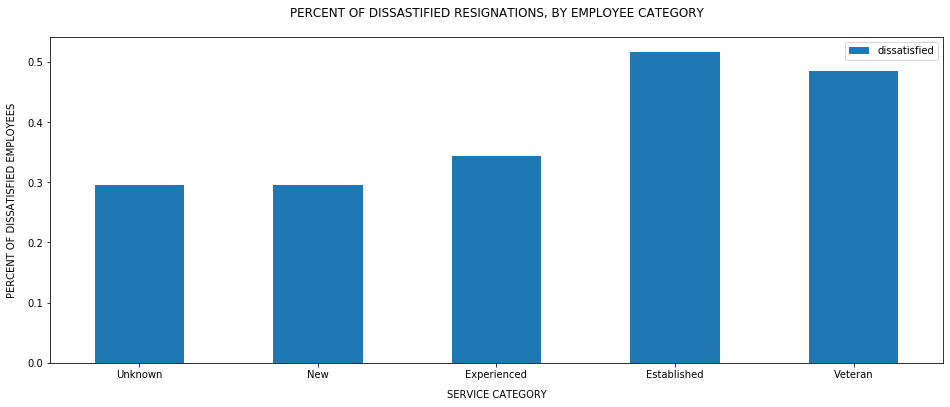

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

diss_pivot.iloc[:,:1].plot(kind='bar', rot = 0, figsize = (16,6))
plt.title('Percent of Dissastified Resignations, by Employee Category'.upper(), pad=20)
plt.xlabel('Service Category'.upper(), labelpad=10)
plt.ylabel('Percent of Dissatisfied Employees'.upper(), labelpad=10)
plt.show()

The graph above suggests that about 3 out of 10 newer employees (less than 3 years in the company) resign due to some kind of dissatisfaction. The probability of an employee resigning due to dissastisfaction increases over time, peaking at the seventh to tenth year mark.

In line with this, if DETE and TAFE are interested in implementing retention programs for older employees, they may want to start with those incentives around the fifth or sixth year of an employee's tenure. Leadership or career advancement trainings, sabbatical leaves, and other perks specifically targeting tenured employees may significantly help in retention and prevent talent drain.